# Day 09. Exercise 00
# Regularization

## 0. Imports

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV

import joblib


## 1. Preprocessing

1. Read the file `dayofweek.csv` that you used in the previous day to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`. Use the additional parameter `stratify`.

In [410]:
df = pd.read_csv('../data/dayofweek.csv')
df.head()

,numTrials,hour,dayofweek,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [411]:
X = df.drop(columns='dayofweek')
y = df['dayofweek']


In [412]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y )

## 2. Logreg regularization

### a. Default regularization

1. Train a baseline model with the only parameters `random_state=21`, `fit_intercept=False`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model


The result of the code where you trained and evaluated the baseline model should be exactly like this (use `%%time` to get the info about how long it took to run the cell):

```
train -  0.62902   |   valid -  0.59259
train -  0.64633   |   valid -  0.62963
train -  0.63479   |   valid -  0.56296
train -  0.65622   |   valid -  0.61481
train -  0.63397   |   valid -  0.57778
train -  0.64056   |   valid -  0.59259
train -  0.64138   |   valid -  0.65926
train -  0.65952   |   valid -  0.56296
train -  0.64333   |   valid -  0.59701
train -  0.63674   |   valid -  0.62687
Average accuracy on crossval is 0.60165
Std is 0.02943
```

In [413]:
model_logreg = LogisticRegression(random_state=21, fit_intercept=False)
model_logreg.fit(X_train, y_train)
model_logreg.score(X_train, y_train)

0.6216617210682492

В некоторых задачах классификации может наблюдаться большой дисбаланс в распределении целевых классов: например, отрицательных образцов может быть в несколько раз больше, чем положительных. В таких случаях рекомендуется использовать стратифицированную выборку, как это реализовано в StratifiedKFold и StratifiedShuffleSplit, чтобы гарантировать, что относительные частоты классов примерно сохраняются в каждой тренировочном и проверочном фолде.

**StratifiedKFold** - это вариация k-фолд, которая возвращает стратифицированные фолды: каждый набор содержит примерно такой же процент образцов каждого целевого класса, как и полный набор.

In [414]:
def crossval(model, X, y, n_splits=10):
    train_scores = []
    valid_scores = []
    cv = StratifiedKFold(n_splits=n_splits)
    for train, valid in cv.split(X, y):
        model.fit(X.iloc[train], y.iloc[train])
        y_train_pred = model.predict(X.iloc[train])
        y_valid_pred = model.predict(X.iloc[valid])
        train_scores.append(accuracy_score(y.iloc[train], y_train_pred))
        valid_scores.append(accuracy_score(y.iloc[valid], y_valid_pred))
    for i in range(len(train_scores)):
        print(f'train -  {train_scores[i]:.5f}   |   valid -  {valid_scores[i]:.5f}')
    print(f'Average accuracy on crossval is {np.mean(valid_scores):.5f}')
    print(f'Std is {np.std(valid_scores):.5f}')

In [415]:
%%time
crossval(model_logreg, X_train, y_train)

train -  0.60346   |   valid -  0.55556
train -  0.62242   |   valid -  0.60000
train -  0.61336   |   valid -  0.53333
train -  0.62902   |   valid -  0.59259
train -  0.59769   |   valid -  0.56296
train -  0.61583   |   valid -  0.57037
train -  0.60923   |   valid -  0.62222
train -  0.62655   |   valid -  0.52593
train -  0.61862   |   valid -  0.54478
train -  0.60049   |   valid -  0.58955
Average accuracy on crossval is 0.56973
Std is 0.02950
CPU times: user 1.16 s, sys: 32 ms, total: 1.2 s
Wall time: 199 ms


### b. Optimizing regularization parameters

1. In the cells below try different values of penalty: `none`, `l1`, `l2` – you can change the values of solver too.

In [416]:
model_logreg = LogisticRegression(penalty=None, random_state=21, fit_intercept=False)
model_logreg.fit(X_train, y_train)
crossval(model_logreg, X_train, y_train)

/home/tanya/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/tanya/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

train -  0.66200   |   valid -  0.62963
train -  0.65787   |   valid -  0.65185
train -  0.66200   |   valid -  0.58519
train -  0.66364   |   valid -  0.63704
train -  0.66447   |   valid -  0.60000
train -  0.65705   |   valid -  0.57778
train -  0.65210   |   valid -  0.69630
train -  0.68261   |   valid -  0.62222
train -  0.66145   |   valid -  0.62687
train -  0.65651   |   valid -  0.60448
Average accuracy on crossval is 0.62313
Std is 0.03288


/home/tanya/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/tanya/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

In [417]:
model_logreg = LogisticRegression(penalty='l1', solver = 'liblinear', random_state=21, fit_intercept=False)
model_logreg.fit(X_train, y_train)
crossval(model_logreg, X_train, y_train)

train -  0.59357   |   valid -  0.55556
train -  0.60346   |   valid -  0.57778
train -  0.59110   |   valid -  0.51111
train -  0.62077   |   valid -  0.61481
train -  0.60181   |   valid -  0.51852
train -  0.60346   |   valid -  0.55556
train -  0.60099   |   valid -  0.61481
train -  0.61995   |   valid -  0.53333
train -  0.61450   |   valid -  0.57463
train -  0.58320   |   valid -  0.57463
Average accuracy on crossval is 0.56307
Std is 0.03394


In [418]:
model_logreg = LogisticRegression(penalty='l2', solver = 'liblinear', random_state=21, fit_intercept=False)
model_logreg.fit(X_train, y_train)
crossval(model_logreg, X_train, y_train)

train -  0.58285   |   valid -  0.54074
train -  0.58945   |   valid -  0.56296
train -  0.59110   |   valid -  0.55556
train -  0.59934   |   valid -  0.59259
train -  0.57873   |   valid -  0.50370
train -  0.59110   |   valid -  0.55556
train -  0.57626   |   valid -  0.59259
train -  0.60758   |   valid -  0.51852
train -  0.59720   |   valid -  0.55970
train -  0.58072   |   valid -  0.57463
Average accuracy on crossval is 0.55566
Std is 0.02731


## 3. SVM regularization

### a. Default regularization

1. Train a baseline model with the only parameters `probability=True`, `kernel='linear'`, `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [419]:
svc = SVC(probability=True, kernel='linear', random_state=21)

In [420]:
%%time
crossval(svc, X_train, y_train)

train -  0.69167   |   valid -  0.65185
train -  0.68838   |   valid -  0.74815
train -  0.70322   |   valid -  0.61481
train -  0.69415   |   valid -  0.64444
train -  0.68920   |   valid -  0.62963
train -  0.68920   |   valid -  0.62963
train -  0.67766   |   valid -  0.71852
train -  0.69415   |   valid -  0.62222
train -  0.68616   |   valid -  0.58209
train -  0.70511   |   valid -  0.64179
Average accuracy on crossval is 0.64831
Std is 0.04675
CPU times: user 3.58 s, sys: 33 ms, total: 3.62 s
Wall time: 2.81 s


### b. Optimizing regularization parameters

1. In the cells below try different values of the parameter `C`.

**Установка C:** По умолчанию C имеет значение 1, и это разумный выбор по умолчанию. Если у вас много зашумленных наблюдений, вам следует уменьшить это значение: уменьшение C соответствует большей регуляризации.

In [421]:
%%time
svc = SVC(C=0.7, probability=True, kernel='linear', random_state=21)
crossval(svc, X_train, y_train)

train -  0.68838   |   valid -  0.65926
train -  0.68508   |   valid -  0.71852
train -  0.69497   |   valid -  0.60000
train -  0.69250   |   valid -  0.64444
train -  0.68673   |   valid -  0.62222
train -  0.68013   |   valid -  0.64444
train -  0.68508   |   valid -  0.71852
train -  0.68590   |   valid -  0.60741
train -  0.68616   |   valid -  0.58209
train -  0.68781   |   valid -  0.62687
Average accuracy on crossval is 0.64238
Std is 0.04380
CPU times: user 2.75 s, sys: 0 ns, total: 2.75 s
Wall time: 2.74 s


In [422]:
%%time
svc = SVC(C=0.5, probability=True, kernel='linear', random_state=21)
crossval(svc, X_train, y_train)

train -  0.66282   |   valid -  0.63704
train -  0.65870   |   valid -  0.68148
train -  0.67024   |   valid -  0.61481
train -  0.66447   |   valid -  0.62222
train -  0.67519   |   valid -  0.60741
train -  0.66035   |   valid -  0.61481
train -  0.65705   |   valid -  0.68889
train -  0.66447   |   valid -  0.57037
train -  0.66310   |   valid -  0.55970
train -  0.66145   |   valid -  0.61194
Average accuracy on crossval is 0.62087
Std is 0.03897
CPU times: user 2.65 s, sys: 938 μs, total: 2.65 s
Wall time: 2.65 s


In [423]:
%%time
svc = SVC(C=0.2, probability=True, kernel='linear', random_state=21)
crossval(svc, X_train, y_train)

train -  0.62984   |   valid -  0.59259
train -  0.60429   |   valid -  0.54815
train -  0.62160   |   valid -  0.58519
train -  0.62984   |   valid -  0.59259
train -  0.63149   |   valid -  0.57037
train -  0.64138   |   valid -  0.60000
train -  0.63149   |   valid -  0.64444
train -  0.63149   |   valid -  0.57778
train -  0.61944   |   valid -  0.53731
train -  0.63262   |   valid -  0.61940
Average accuracy on crossval is 0.58678
Std is 0.02987
CPU times: user 2.74 s, sys: 975 μs, total: 2.74 s
Wall time: 2.74 s


## 4. Tree

### a. Default regularization

1. Train a baseline model with the only parameter `max_depth=10` and `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [424]:
%%time
model_tree = DecisionTreeClassifier(max_depth=10, random_state=21)
crossval(model_tree, X_train, y_train)

train -  0.81039   |   valid -  0.74815
train -  0.77741   |   valid -  0.74815
train -  0.83347   |   valid -  0.71111
train -  0.79720   |   valid -  0.76296
train -  0.82440   |   valid -  0.75556
train -  0.80379   |   valid -  0.68889
train -  0.80709   |   valid -  0.76296
train -  0.80132   |   valid -  0.65926
train -  0.80807   |   valid -  0.76119
train -  0.80478   |   valid -  0.68657
Average accuracy on crossval is 0.72848
Std is 0.03657
CPU times: user 72.7 ms, sys: 6 μs, total: 72.7 ms
Wall time: 71.6 ms


### b. Optimizing regularization parameters

1. In the cells below try different values of the parameter `max_depth`.
2. As a bonus, play with other regularization parameters trying to find the best combination.

In [425]:
%%time
model_tree = DecisionTreeClassifier(max_depth=5, random_state=21)
crossval(model_tree, X_train, y_train)

train -  0.59522   |   valid -  0.53333
train -  0.56307   |   valid -  0.53333
train -  0.60099   |   valid -  0.55556
train -  0.59522   |   valid -  0.57037
train -  0.60264   |   valid -  0.57778
train -  0.57873   |   valid -  0.53333
train -  0.58368   |   valid -  0.54815
train -  0.59275   |   valid -  0.51111
train -  0.58237   |   valid -  0.56716
train -  0.60132   |   valid -  0.50000
Average accuracy on crossval is 0.54301
Std is 0.02423
CPU times: user 61 ms, sys: 20 μs, total: 61 ms
Wall time: 60.2 ms


In [426]:
%%time
model_tree = DecisionTreeClassifier(max_depth=20, random_state=21)
crossval(model_tree, X_train, y_train)

train -  0.98763   |   valid -  0.87407
train -  0.98928   |   valid -  0.90370
train -  0.98516   |   valid -  0.84444
train -  0.98763   |   valid -  0.90370
train -  0.98928   |   valid -  0.88889
train -  0.98186   |   valid -  0.85926
train -  0.98846   |   valid -  0.91852
train -  0.99093   |   valid -  0.88148
train -  0.99094   |   valid -  0.88060
train -  0.98847   |   valid -  0.86567
Average accuracy on crossval is 0.88203
Std is 0.02141
CPU times: user 93.9 ms, sys: 8 μs, total: 93.9 ms
Wall time: 93 ms


Бонус:

In [427]:
model_tree = DecisionTreeClassifier(max_depth=20, random_state=21)
param_grid = {'max_depth': np.arange(2, 50)}
gs = GridSearchCV(model_tree, param_grid, scoring='accuracy')
gs.fit(X_train, y_train)
print(f'лучшие параметры: {gs.best_params_}')
print(f'лучший score: {gs.best_score_}')

лучшие параметры: {'max_depth': 22}
лучший score: 0.8664463720225802


In [428]:
%%timeit
model_tree = DecisionTreeClassifier(max_depth=22, random_state=21)
crossval(model_tree, X_train, y_train)

train -  0.99423   |   valid -  0.85926
train -  0.99340   |   valid -  0.90370
train -  0.99340   |   valid -  0.85185
train -  0.99588   |   valid -  0.89630
train -  0.99423   |   valid -  0.87407
train -  0.99093   |   valid -  0.85185
train -  0.99176   |   valid -  0.91852
train -  0.99588   |   valid -  0.88889
train -  0.99753   |   valid -  0.88060
train -  0.99176   |   valid -  0.86567
Average accuracy on crossval is 0.87907
Std is 0.02153
train -  0.99423   |   valid -  0.85926
train -  0.99340   |   valid -  0.90370
train -  0.99340   |   valid -  0.85185
train -  0.99588   |   valid -  0.89630
train -  0.99423   |   valid -  0.87407
train -  0.99093   |   valid -  0.85185
train -  0.99176   |   valid -  0.91852
train -  0.99588   |   valid -  0.88889
train -  0.99753   |   valid -  0.88060
train -  0.99176   |   valid -  0.86567
Average accuracy on crossval is 0.87907
Std is 0.02153
train -  0.99423   |   valid -  0.85926
train -  0.99340   |   valid -  0.90370
train -  0

## 5. Random forest

### a. Default regularization

1. Train a baseline model with the only parameters `n_estimators=50`, `max_depth=14`, `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [429]:
%%time
model_forest = RandomForestClassifier(n_estimators=50, max_depth=14, random_state=21)
crossval(model_forest, X_train, y_train)

train -  0.96208   |   valid -  0.88148
train -  0.95878   |   valid -  0.93333
train -  0.96290   |   valid -  0.88889
train -  0.96455   |   valid -  0.90370
train -  0.96867   |   valid -  0.90370
train -  0.96455   |   valid -  0.85926
train -  0.96455   |   valid -  0.91852
train -  0.97197   |   valid -  0.85926
train -  0.97117   |   valid -  0.90299
train -  0.96458   |   valid -  0.85821
Average accuracy on crossval is 0.89093
Std is 0.02490
CPU times: user 916 ms, sys: 985 μs, total: 917 ms
Wall time: 917 ms


### b. Optimizing regularization parameters

1. In the new cells try different values of the parameters `max_depth` and `n_estimators`.
2. As a bonus, play with other regularization parameters trying to find the best combination.

In [430]:
%%time
model_forest = RandomForestClassifier(n_estimators=50, max_depth=22, random_state=21)
crossval(model_forest, X_train, y_train)

train -  0.99753   |   valid -  0.88148
train -  0.99918   |   valid -  0.93333
train -  0.99918   |   valid -  0.88889
train -  0.99918   |   valid -  0.91852
train -  0.99835   |   valid -  0.91111
train -  0.99835   |   valid -  0.88889
train -  0.99835   |   valid -  0.91852
train -  0.99918   |   valid -  0.88889
train -  1.00000   |   valid -  0.89552
train -  0.99671   |   valid -  0.87313
Average accuracy on crossval is 0.89983
Std is 0.01837
CPU times: user 940 ms, sys: 995 μs, total: 941 ms
Wall time: 941 ms


In [431]:
%%time
model_forest = RandomForestClassifier(n_estimators=25, max_depth=22, random_state=21)
crossval(model_forest, X_train, y_train)

train -  0.99753   |   valid -  0.88889
train -  0.99258   |   valid -  0.94074
train -  0.99505   |   valid -  0.87407
train -  0.99670   |   valid -  0.92593
train -  0.99258   |   valid -  0.91111
train -  0.99835   |   valid -  0.88889
train -  0.99505   |   valid -  0.91852
train -  0.99670   |   valid -  0.88889
train -  0.99671   |   valid -  0.90299
train -  0.99506   |   valid -  0.87313
Average accuracy on crossval is 0.90132
Std is 0.02134
CPU times: user 502 ms, sys: 2.02 ms, total: 504 ms
Wall time: 503 ms


In [432]:
%%time
model_forest = RandomForestClassifier(n_estimators=100, max_depth=22, random_state=21)
crossval(model_forest, X_train, y_train)

train -  0.99835   |   valid -  0.89630
train -  0.99918   |   valid -  0.94074
train -  0.99835   |   valid -  0.88148
train -  0.99835   |   valid -  0.93333
train -  0.99918   |   valid -  0.91111
train -  0.99753   |   valid -  0.88148
train -  0.99918   |   valid -  0.91852
train -  0.99918   |   valid -  0.89630
train -  1.00000   |   valid -  0.90299
train -  0.99918   |   valid -  0.88806
Average accuracy on crossval is 0.90503
Std is 0.01962
CPU times: user 1.84 s, sys: 4.99 ms, total: 1.84 s
Wall time: 1.84 s


Бонус:

max_featuresс - указывает, сколько признаков будет случайно выбрано для каждого дерева. Возможные значения: все признаки ('auto'), квадратный корень из количества признаков ('sqrt'), логарифм количества признаков ('log2').

In [433]:
model_forest = RandomForestClassifier(n_estimators=50, max_depth=14, random_state=21)


In [436]:
# from sklearn.model_selection import RandomizedSearchCV
n_estimators = np.arange(20, 100, 5)
max_features = ['auto', 'sqrt', 'log2']
max_depth = np.arange(2, 70, 10)
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(model_forest, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, # уровень подробности вывода информации (1 — выводить сообщения о ходе работы).
                        n_jobs=-1, # использовать все доступные процессоры для параллельной обработки.
                        random_state=21)
rs.fit(X_train, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/home/tanya/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
87 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
56 fits failed with the following error:
Traceback (most recent call last):
  File "/home/tanya/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/tanya/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/tanya/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/tany

{'n_estimators': 35,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 62,
 'bootstrap': False}

In [435]:
param_grid = {'max_depth': np.arange(2, 70, 10),
              'n_estimators': np.arange(20, 150, 5)}
gs = GridSearchCV(model_forest, param_grid, scoring='accuracy')
gs.fit(X_train, y_train)
print(f'лучшие параметры: {gs.best_params_}')
print(f'лучший score: {gs.best_score_}')

/home/tanya/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


лучшие параметры: {'max_depth': 42, 'n_estimators': 125}
лучший score: 0.8998402863830373


## 6. Predictions

1. Choose the best model and use it to make predictions for the test dataset.
2. Calculate the final accuracy.
3. Analyze: for which weekday your model makes the most errors (in % of the total number of samples of that class in your test dataset).
4. Save the model.

In [440]:
best_model_forest = RandomForestClassifier(max_features='log2', n_estimators=125, max_depth=42, random_state=21)
best_model_forest.fit(X_train, y_train)
prediction = best_model_forest.predict(X_test)


In [441]:
accuracy_score(y_test, prediction)

0.9408284023668639

Функция confusion_matrix оценивает точность классификации, вычисляя матрицу ошибок (или как еще называют Матрицу Несоответствий), где каждая строка соответствует истинному классу 

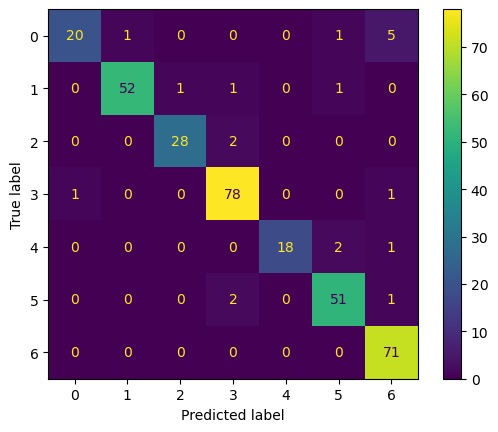

In [444]:
ConfusionMatrixDisplay.from_estimator(best_model_forest, X_test, y_test)

In [446]:
joblib.dump(best_model_forest, 'best_model_forest.pkl')

['best_model_forest.pkl']